# No Shows

Data showing information of No shows for medical appointments (https://www.kaggle.com/datasets/joniarroba/noshowappointments): 
- Why do 30% of patients miss their scheduled appointments?

Assumptions after glacing at the data - variables that may affect no shows;
- Age
- Location
- Appt time of day
- Gender
- Scholarship
- Pre-existing conditions or handicap
- Whether a SMS had been received
- or a mix of any of the above.


Table of Contents

* [Cleaning the DF](#first-bullet)
* [Cleaning the data - Age](#second-bullet)
* [Cleaning the data - Appt & Waiting times](#third-bullet)
* [Exploring the data](#forth-bullet)
* [Exploring the data - Waiting Time](#fifth-bullet)
* [Exploring the data - SMS reminder](#sixth-bullet)
* [Exploring the data - Appointment Time](#seventh-bullet)
* [Exploring the data - Age](#eighth-bullet)
* [Exploring the data - Gender](#ninth-bullet)
* [Exploring the data - Neighbourhood](#tenth-bullet)
* [Exploring the data - Medical](#eleventh-bullet)
* [Summary](#twelth-bullet)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df = pd.read_csv('No_shows.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


## Cleaning the DF <a class="anchor" id="first-bullet"></a>

Matrix 110527 by 14

Things to look at/clean up;
- Time stamp change from object to datetime
- Fix heading spellings
- Change ScheduledDay & AppointmentDay to be more clear
- Add 'waiting time' and 'time of appointment' column 
- No show change from object to bool - No show yes/no is confusing, change to 'missed appt' T/F? 
- PatientId & AppointmentID are irrelevant to no shows so can drop (as long as no duplicates in AppointmentID)

In [5]:
df.duplicated('AppointmentID')

0         False
1         False
2         False
3         False
4         False
          ...  
110522    False
110523    False
110524    False
110525    False
110526    False
Length: 110527, dtype: bool

- Length is 110527, index is 0 - 110526, therefore no duplicates 

In [6]:
# Change time stamp
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'].astype('datetime64[ns, Brazil/East]'))
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'].astype('datetime64[ns, Brazil/East]'))

# Correct Headings
df.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap', 'ScheduledDay': 'AppointmentDate', 'AppointmentDay': 'BookingDate'}, inplace=True)

# Add a WaitingTime and AppointmentHour column
df['WaitingTime'] = (df['BookingDate'].dt.date - df['AppointmentDate'].dt.date).dt.days.astype('int16')
df['AppointmentHour'] = (df['AppointmentDate'].apply(lambda x: x.hour)).astype('int16')

# Change 'No-show' to 'MissedAppt' & type to boolean
df['MissedAppointment'] = df['No-show'].map({'yes': True, 'No': False}).astype(bool)

# Drop the PatientId & AppointmentID columns
df = df.drop(columns = ['PatientId', 'AppointmentID', 'No-show'])

df.head()

,Gender,AppointmentDate,BookingDate,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,WaitingTime,AppointmentHour,MissedAppointment
0,F,2016-04-29 15:38:08-03:00,2016-04-28 21:00:00-03:00,62,JARDIM DA PENHA,0,1,0,0,0,0,-1,15,False
1,M,2016-04-29 13:08:27-03:00,2016-04-28 21:00:00-03:00,56,JARDIM DA PENHA,0,0,0,0,0,0,-1,13,False
2,F,2016-04-29 13:19:04-03:00,2016-04-28 21:00:00-03:00,62,MATA DA PRAIA,0,0,0,0,0,0,-1,13,False
3,F,2016-04-29 14:29:31-03:00,2016-04-28 21:00:00-03:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,-1,14,False
4,F,2016-04-29 13:07:23-03:00,2016-04-28 21:00:00-03:00,56,JARDIM DA PENHA,0,1,1,0,0,0,-1,13,False


In [7]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype                      
---  ------             --------------   -----                      
 0   Gender             110527 non-null  object                     
 1   AppointmentDate    110527 non-null  datetime64[ns, Brazil/East]
 2   BookingDate        110527 non-null  datetime64[ns, Brazil/East]
 3   Age                110527 non-null  int64                      
 4   Neighbourhood      110527 non-null  object                     
 5   Scholarship        110527 non-null  int64                      
 6   Hypertension       110527 non-null  int64                      
 7   Diabetes           110527 non-null  int64                      
 8   Alcoholism         110527 non-null  int64                      
 9   Handicap           110527 non-null  int64                      
 10  SMS_received       110527 non-null  int64               

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,WaitingTime,AppointmentHour
count,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,9.183702,7.776715
std,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,15.254996,3.217125
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.000000,3.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,5.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,7.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,14.000000,10.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,178.000000,18.000000


## Cleaning the data - Age <a class="anchor" id="second-bullet"></a>

Things to look at;
- Outlier Vs realistic data point
- Age (Min = -1, max = 115)
 

In [8]:
df['Age'].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

In [9]:
UniqueAge = df['Age'].unique()
print(sorted(UniqueAge))

[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]


In [10]:
df[df['Age']==df['Age'].min()]

,Gender,AppointmentDate,BookingDate,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,WaitingTime,AppointmentHour,MissedAppointment
99832,F,2016-06-06 05:58:13-03:00,2016-06-05 21:00:00-03:00,-1,ROMÃO,0,0,0,0,0,0,-1,5,False


In [11]:
# As only 1 anomaly, we will replace with mean of ages

df['Age'] = df['Age'].replace([-1], df['Age'].mean())
df['Age'].describe()

count    110527.000000
mean         37.089219
std          23.109921
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

- Issue at top of age, 115 - this is a large jump from the previous age of 102

In [12]:
df[df['Age']==df['Age'].max()]

,Gender,AppointmentDate,BookingDate,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,WaitingTime,AppointmentHour,MissedAppointment
63912,F,2016-05-16 06:17:44-03:00,2016-05-18 21:00:00-03:00,115.0,ANDORINHAS,0,0,0,0,1,0,2,6,True
63915,F,2016-05-16 06:17:44-03:00,2016-05-18 21:00:00-03:00,115.0,ANDORINHAS,0,0,0,0,1,0,2,6,True
68127,F,2016-04-08 11:29:17-03:00,2016-05-15 21:00:00-03:00,115.0,ANDORINHAS,0,0,0,0,1,0,37,11,True
76284,F,2016-05-30 06:44:51-03:00,2016-05-29 21:00:00-03:00,115.0,ANDORINHAS,0,0,0,0,1,0,-1,6,False
97666,F,2016-05-19 04:57:56-03:00,2016-06-02 21:00:00-03:00,115.0,SÃO JOSÉ,0,1,0,0,0,1,14,4,False


In [13]:
print(df["Age"].value_counts())
print(np.percentile(df["Age"],[99.9, 99.99]))

0.000000      3539
1.000000      2273
52.000000     1746
49.000000     1652
53.000000     1651
              ... 
115.000000       5
100.000000       4
102.000000       2
99.000000        1
37.088874        1
Name: Age, Length: 104, dtype: int64
[93.     98.9474]


- As there are 3539 people aged 0, we will not remove any more from the lower end of the scale
- At the top of the scale we do not know if the 115 is an error or an outlier - there is very little data over 99 
-- Top 0.1% > 93 (over 110 people)
-- Top 0.01% > 99 (almost) (11 people)

- Lets look at a boxplot to check for outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x1a5b45f1370>,
 'caps': [<matplotlib.lines.Line2D at 0x1a5b45d6cd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a5b45f17c0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a5b45d65b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a5b45d6220>],
 'means': []}

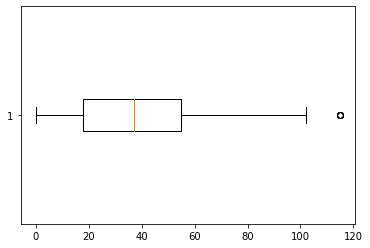

In [14]:
plt.boxplot(df['Age'], vert = 0)

In [15]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
print(Q3 + 1.5 * IQR)

37.0
110.5


- The boxplot shows outliers > 110.5, so we will remove the age of 115 (5 data points)

In [16]:
df.drop(df[df['Age'] == 115].index, inplace = True)

In [17]:
df[df['Age']==df['Age'].max()]

,Gender,AppointmentDate,BookingDate,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,WaitingTime,AppointmentHour,MissedAppointment
58014,F,2016-05-03 06:14:53-03:00,2016-05-02 21:00:00-03:00,102.0,CONQUISTA,0,0,0,0,0,0,-1,6,False
90372,F,2016-05-31 07:19:49-03:00,2016-06-01 21:00:00-03:00,102.0,MARIA ORTIZ,0,0,0,0,0,0,1,7,False


In [18]:
df['Age'].describe()

count    110522.000000
mean         37.085694
std          23.104501
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         102.000000
Name: Age, dtype: float64

- This looks much better, no negatives and more realistic max
- The mean has only slightly dropped by 0.00318, 1 day less, and the quartiles have not changed
- Overall this has not affected the data

## Cleaning the data - Appt & Waiting times <a class="anchor" id="third-bullet"></a>

- I am unsure why some of the waiting times were negative, while the others are positive, but using excel I can see that its only 5 entries so I suspect that the data got incorrectly inputted by mixing the column headings up, so I will just replace them

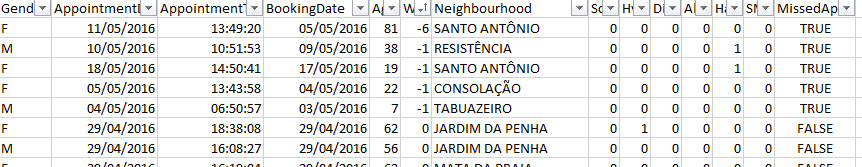

In [19]:
df['WaitingTime'] = df['WaitingTime'].replace([-1], 1)
df['WaitingTime'] = df['WaitingTime'].replace([-2], 2)
df['WaitingTime'] = df['WaitingTime'].replace([-6], 6)
df['WaitingTime'] = df['WaitingTime'].replace([-7], 7)

# Had to also negate -7 to make the WaitingTime all positive, although this didn't show up on my excel? 

In [20]:
df.describe()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,WaitingTime,AppointmentHour
count,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000,110522.000000
mean,37.085694,0.098270,0.197246,0.071868,0.030401,0.022213,0.321031,9.881716,7.776768
std,23.104501,0.297681,0.397921,0.258270,0.171689,0.161439,0.466875,14.812392,3.217150
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,7.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,14.000000,10.000000
max,102.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,178.000000,18.000000


## Exploring the data <a class="anchor" id="forth-bullet"></a>

- Lets look at the correlation of each of the variables

In [21]:
df.corr()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,WaitingTime,AppointmentHour,MissedAppointment
Age,1.000000,-0.092437,0.504725,0.292509,0.095862,0.077369,0.012676,0.030480,0.014837,-0.060497
Scholarship,-0.092437,1.000000,-0.019729,-0.024898,0.035020,-0.008520,0.001190,-0.029691,-0.024474,0.029152
Hypertension,0.504725,-0.019729,1.000000,0.433096,0.087973,0.080249,-0.006306,-0.020314,-0.032608,-0.035670
Diabetes,0.292509,-0.024898,0.433096,1.000000,0.018471,0.057629,-0.014554,-0.028976,-0.014209,-0.015168
Alcoholism,0.095862,0.035020,0.087973,0.018471,1.000000,0.004689,-0.026150,-0.037071,-0.002784,-0.000188
Handicap,0.077369,-0.008520,0.080249,0.057629,0.004689,1.000000,-0.024025,-0.019235,0.002875,-0.006380
SMS_received,0.012676,0.001190,-0.006306,-0.014554,-0.026150,-0.024025,1.000000,0.377649,0.060707,0.126481
WaitingTime,0.030480,-0.029691,-0.020314,-0.028976,-0.037071,-0.019235,0.377649,1.000000,0.083361,0.173587
AppointmentHour,0.014837,-0.024474,-0.032608,-0.014209,-0.002784,0.002875,0.060707,0.083361,1.000000,0.060817
MissedAppointment,-0.060497,0.029152,-0.035670,-0.015168,-0.000188,-0.006380,0.126481,0.173587,0.060817,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

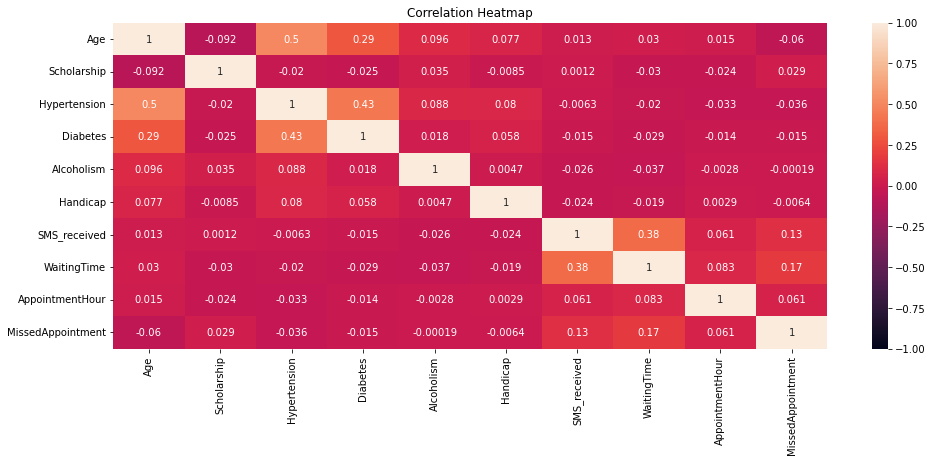

In [22]:
# Let's look at this as a heat map for easier understanding

plt.figure(figsize=(16, 6))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True).set_title('Correlation Heatmap')

We can see some good correlation between;
- Age and Hypertension
- Age and Diabetes
- Hypertension and Diabetes
- WaitingTime and SMS_received


However, we are mainly concerned with the affects on MissedAppointment so;

In [23]:
df.corr()[['MissedAppointment']].sort_values(by='MissedAppointment', ascending=False)

,MissedAppointment
MissedAppointment,1.000000
WaitingTime,0.173587
SMS_received,0.126481
AppointmentHour,0.060817
Scholarship,0.029152
Alcoholism,-0.000188
Handicap,-0.006380
Diabetes,-0.015168
Hypertension,-0.035670
Age,-0.060497


- From this we can see that the main factors of Missed Appts using Pearson's Cooeffiecient (linear) are
-- WaitingTime
-- SMS_received
-- AppointmentHour
-- Age

In [24]:
df.corr(method='spearman')[['MissedAppointment']].sort_values(by='MissedAppointment', ascending=False)

,MissedAppointment
MissedAppointment,1.000000
WaitingTime,0.242955
SMS_received,0.126481
AppointmentHour,0.065190
Scholarship,0.029152
Alcoholism,-0.000188
Handicap,-0.007615
Diabetes,-0.015168
Hypertension,-0.035670
Age,-0.061322


- Double checking using Spearman's coefficient, we see results are similar (by top correlation) so lets look at;
-- How many days had expired between booking and the appointment
-- Whether they had an SMS reminder
- To a lesser extent we should also look at 
-- What time their appointment was at
-- What age they are

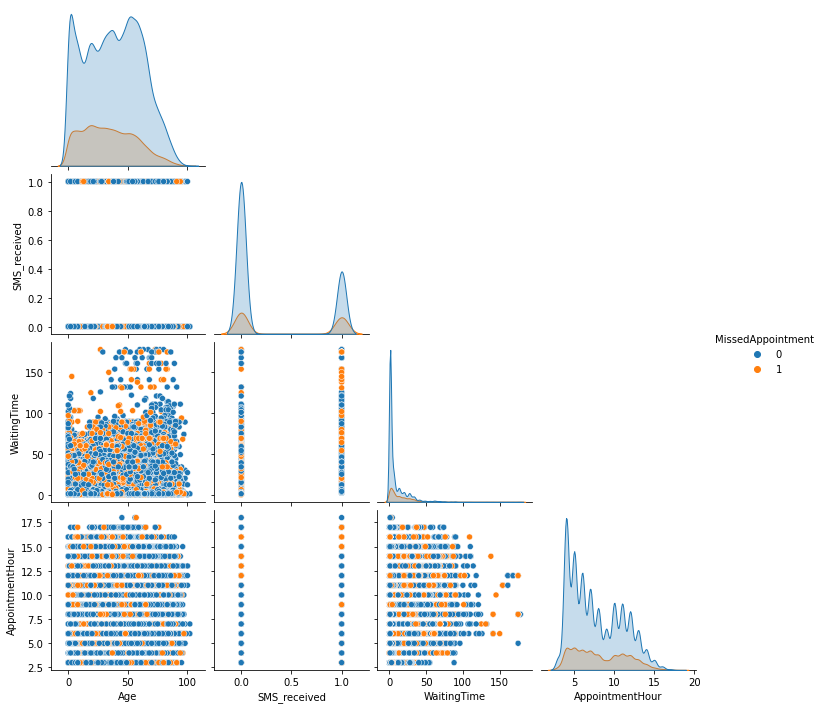

In [25]:
dfn = df
dfn['MissedAppointment'] = dfn['MissedAppointment'].astype('int16')
sns.pairplot(dfn[['Age', 'SMS_received', 'WaitingTime', 'AppointmentHour', 'MissedAppointment']], hue="MissedAppointment", corner = True)
plt.show()

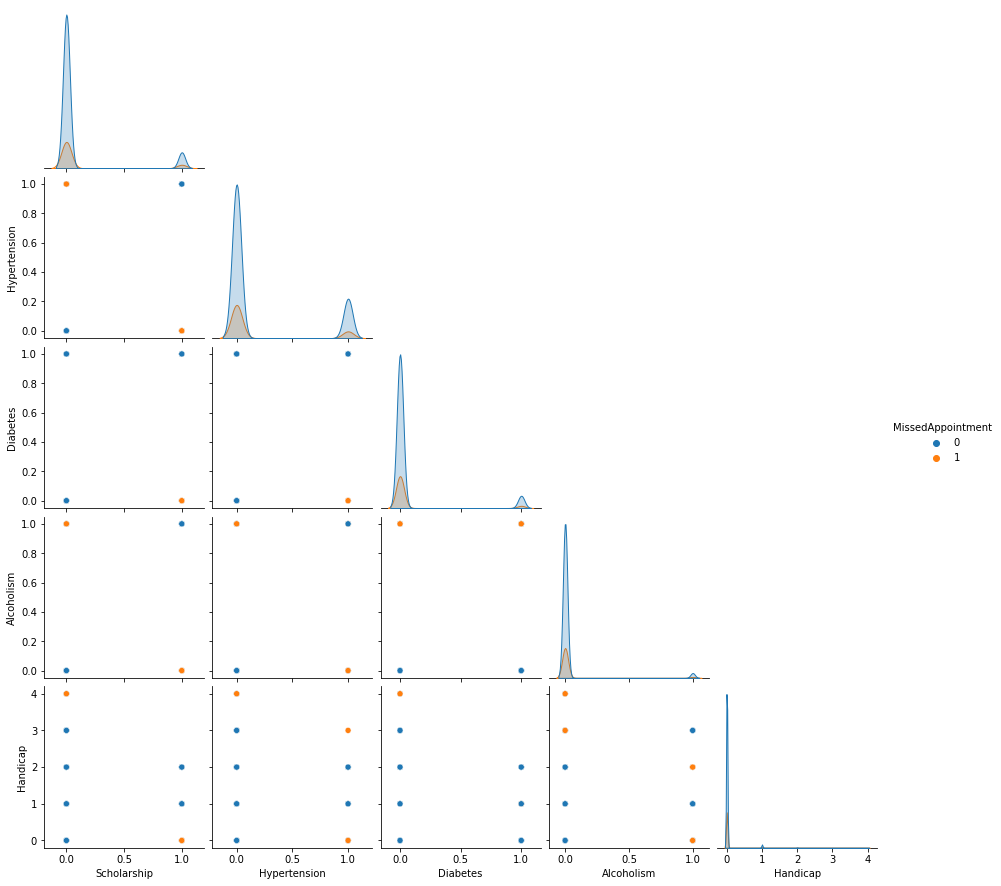

In [26]:
sns.pairplot(dfn[['Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'MissedAppointment']], hue="MissedAppointment", corner = True)
plt.show()

Double checking with pairplot - no other correlation jumps out

## Exploring the data - Waiting Time <a class="anchor" id="fifth-bullet"></a>

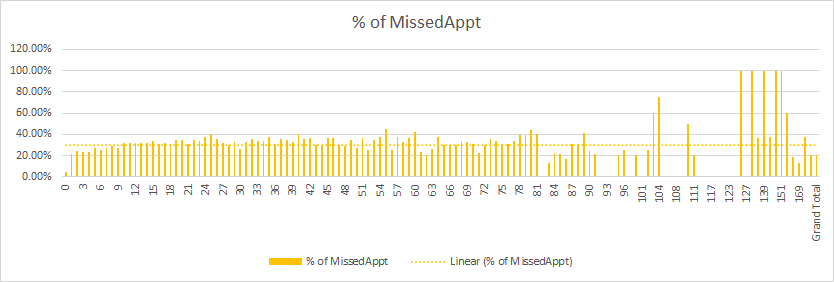

- Looks like there is consistently ~30% of missed appointments irrelevent of how many days people have been kept waiting - this is probability were the headline Q came from
- We need to look deeper as the average is very different when the number of days is > 10 and < 100

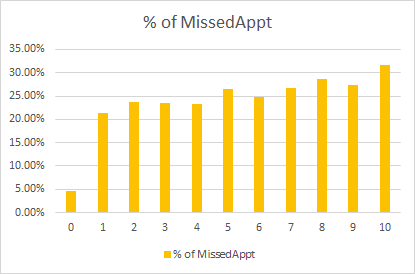

- For Waiting Time < 10 days, the % of Missing Appointments is less than 30%
- For Waiting Time < 1 days, the % of Missing Appointments is less than 5% - and this is representative of over 8% of all MissAppt

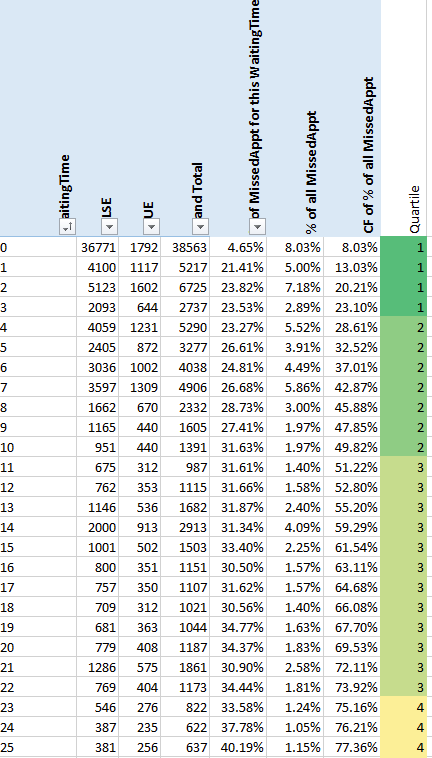

Looking at the Quartiles;

- 25% of all Missed Appointments are within the first 3 days
- 50% of all Missed Appointments are within the first 10 days
- 75% of all Missed Appointments are within the first 22 days


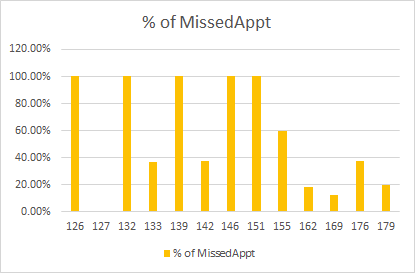

This data of WaitingTime > 125 days skews the data as the average for each day is so large
- As a percent of Missing Appt - 99% of people were to be seen <73 days since BookingDate
- Therefore the last 1% of WaitingTime is everything over 73 days!

In [27]:
dfx = pd.read_excel('WaitingTime_Excel.xlsx')
dfx.head() 

,WaitingTime,FALSE,TRUE,Grand Total,% of MissedAppt for this WaitingTime,% of all MissedAppt,CF of % of all MissedAppt
0,0,36771.0,1792.0,38563,0.046469,0.080290,0.080290
1,1,4100.0,1117.0,5217,0.214108,0.050047,0.130337
2,2,5123.0,1602.0,6725,0.238216,0.071777,0.202115
3,3,2093.0,644.0,2737,0.235294,0.028854,0.230969
4,4,4059.0,1231.0,5290,0.232703,0.055155,0.286124


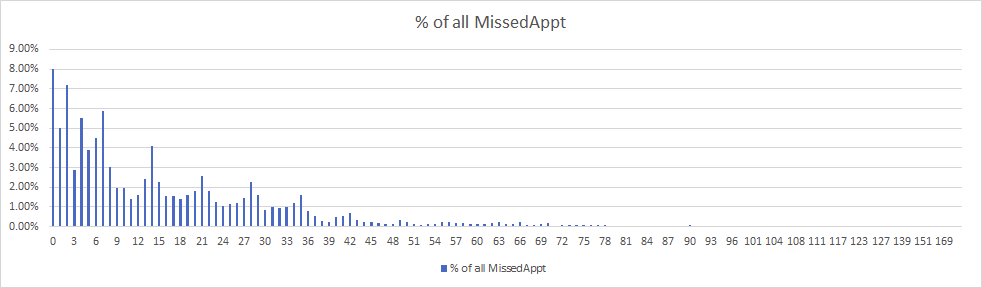
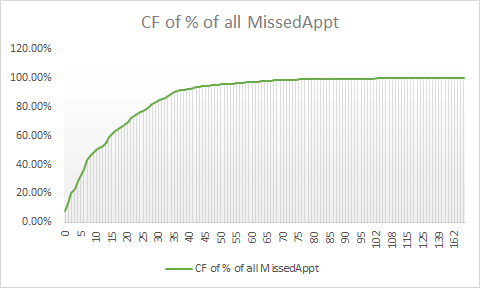

Just to reiterate

- 25% of all Missed Appointments are within the first 3 days
- 50% of all Missed Appointments are within the first 10 days
- 75% of all Missed Appointments are within the first 22 days

So those MissedAppt that only represent 5% are weighted more than those > 5 days

This means that just less than half of all Missed Appointments are less than the overall 30% mark seen earlier

- Looking at the weighted average, sum(% of MissedAppt for this WaitingTime * % of all MissedAppt)/sum(True) - Missed Appt = 27.39% 
- Looking at average of number of missed appt/number of total appt - Missed Appt = 20.19%

## Exploring the data - SMS reminder <a class="anchor" id="sixth-bullet"></a>

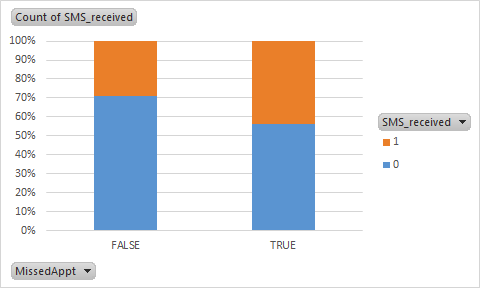

- When we look at the % of missed appointments based on SMS reminder, it looks like you are more likely to miss an appointment if you have received the reminder... 
- However when we look at the numbers there are far fewer people receive an SMS and the proportion is just more even.

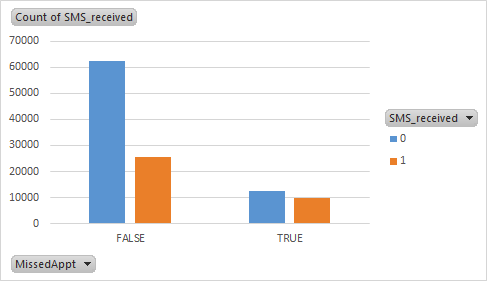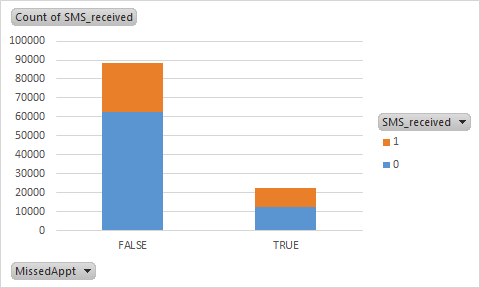

There are 25698 people who attended their appointment after an SMS reminder. Imagine if every single one of them would not have attended if they didn't receive the reminder... then the number of peopl who would have missed their appointment would have increased from 16.70% to 34.59% - almost double!
### By sending an SMS reminder it is possible that you have almost halved the number of Missed Appointments!
- Further exploration - Are you more likely to get an SMS reminder if you have missed an appointment previously?

## Exploring the data - Appointment Time <a class="anchor" id="seventh-bullet"></a>

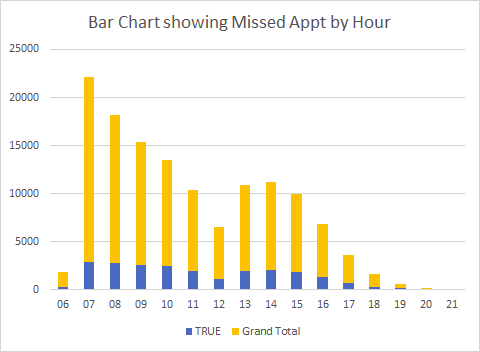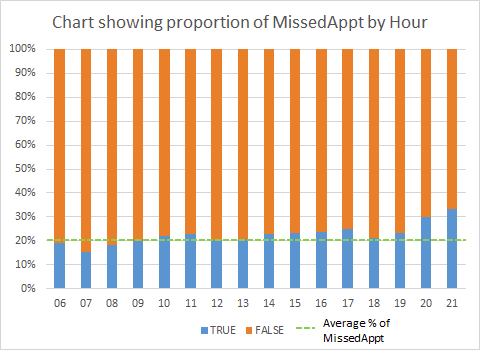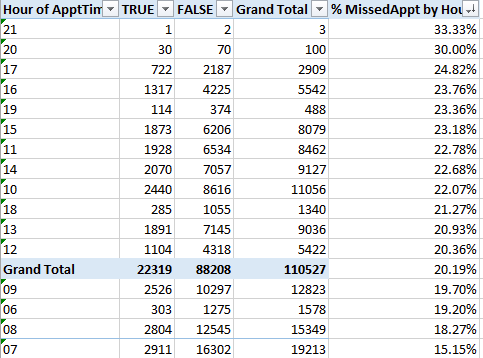

- The majority of appointment times are between 7am - 4pm (with a ease up over lunch)
- Looking at the proportion of Missed Appointments by hour shows that most hours are around the average (20.19%), with the exception of 7am has a lower proportion of No Shows at 15.15%
At the higher end of the scale, the top 3 hours in the day most likely to have No Shows are;
- 9pm (33.33%) - Only 3 people out of 110527 so not enought data to read into
- 8pm (30.00%) - Less than 0.1% of all Missed Appt
- 5pm (24.82%) - 2.63% of all Missed Data
Maybe those who have missed previous appointments are not allowed to book in after 5pm in the future? 

## Exploring the data - Age <a class="anchor" id="eighth-bullet"></a>

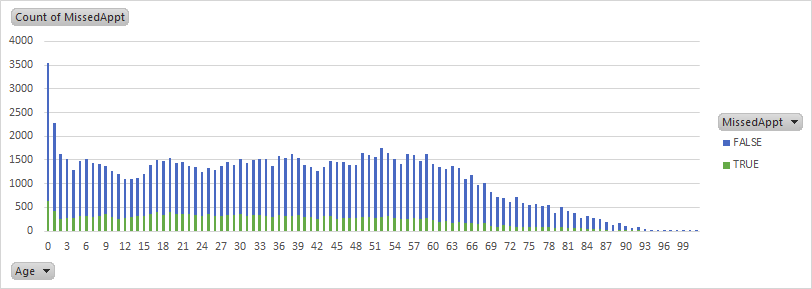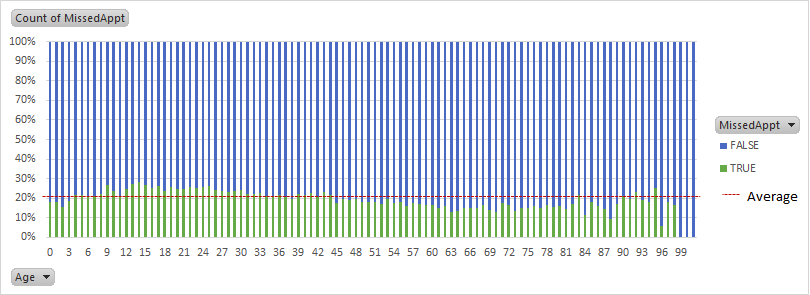

- Age 0 and 1 have a much higher number of appointments, but the % of missed appt are actually lower than the average of 20.19%
- There is a group (8 < Age < 37) that all ages have an above average MissedAppt
- Above 44 years old hardly any age has an above averaged MissedAppt (except ages 83, 90, 92 & 95)

Breakdown: Age & Gender

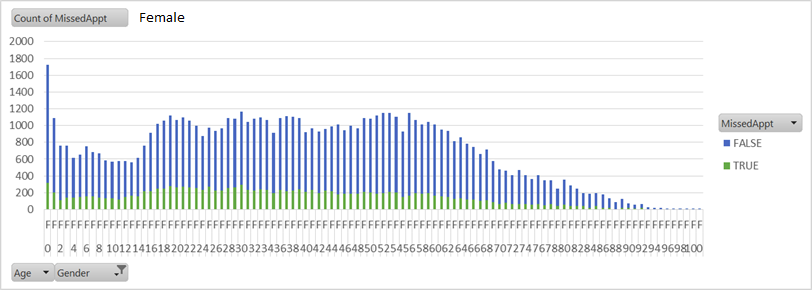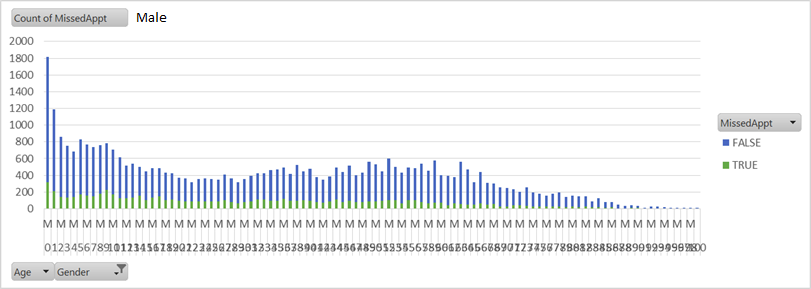

- The number of people Age < 15 are similar in both gender but then female numbers rise, while males numbers drop
- More medical issues affecting women compared to men? Or is it a culture thing - men don't like going to the doctors? 

Looking at the proportions for each gender

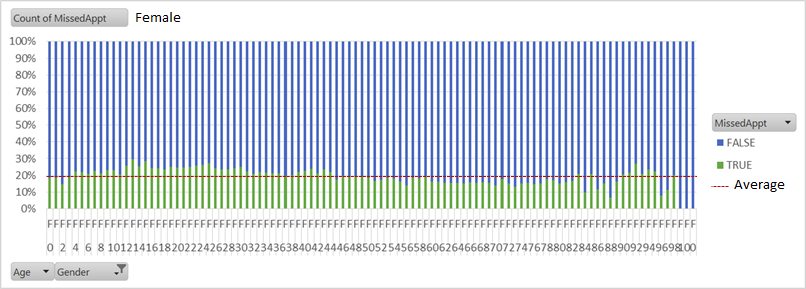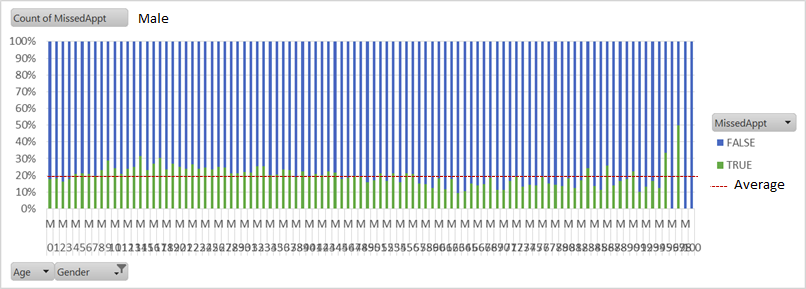

- Very similar for both genders - both have a higher % of MissedAppt 8 < Age < 34
- For men aged > 56, there is a drop in % of MissedAppt (exceptions at ages 86, 88, 97 & 99 (at 50% - but only with a small number of data points))
- For women 90 < aged < 95 there is a slight rise in % of MissedAppt
- 
- Main ages to work with to help lower Missed Appointments = 8 to 34 years old for both genders
- Gender does not seem to affect age when it comes to missed appointments - need to explore independently  
- Men are less likely to miss an appointment ~aged 60
- Both genders need support over 90 years old to not missed appointments

Columns not explored yet, as quantitative: 
- Gender
- Neighbourhood

## Exploring the data - Gender <a class="anchor" id="ninth-bullet"></a>

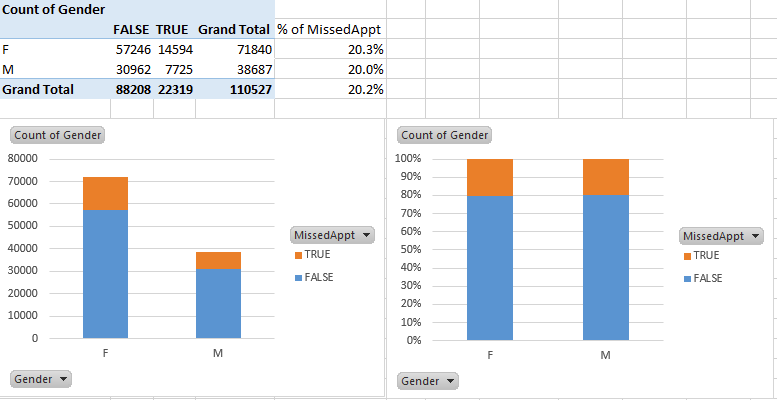

- This confirms that Gender has no bearing on Missed Appt

## Exploring the data - Neighbourhood <a class="anchor" id="tenth-bullet"></a>

In [28]:
df['Neighbourhood'].value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

- I would have liked to create a 2 way table to show MissedAppointment Vs Neighbourhood as well as % of MissedAppointment(True) by Neighbourhood. But I don't know how to do that in Python yet...
- Will use Excel Pivot Table instead
- This is a part of a pivot table showing % of MissedAppt by Neighbourhood

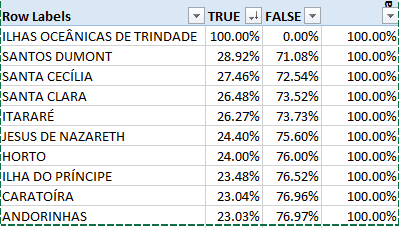

- The top result is an anomaly as it was only 2 missed appts out of 2, which gives 100% - we will delete as so little data - the average is 20.19% still
- Therefore the top % of MissedAppt by Neighbourhood are 
-- SANTOS DUMONT
-- SANTA CECÍLIA
-- SANTA CLARA
-- ITARARÉ
- All of these have a MissedAppt above 25% and need further exploration

Power BI Visualisations:
- 1st chart: Bar chart of % of MissedAppt by Neighbourhood (Orange line = Average 20.19%)
- 2nd chart: Bubble Map of Location by Count of MissedAppt in each area Neighbourhood
- 3rd chart: Bar chart of Count of MissedAppt in top 5 Neighbourhoods

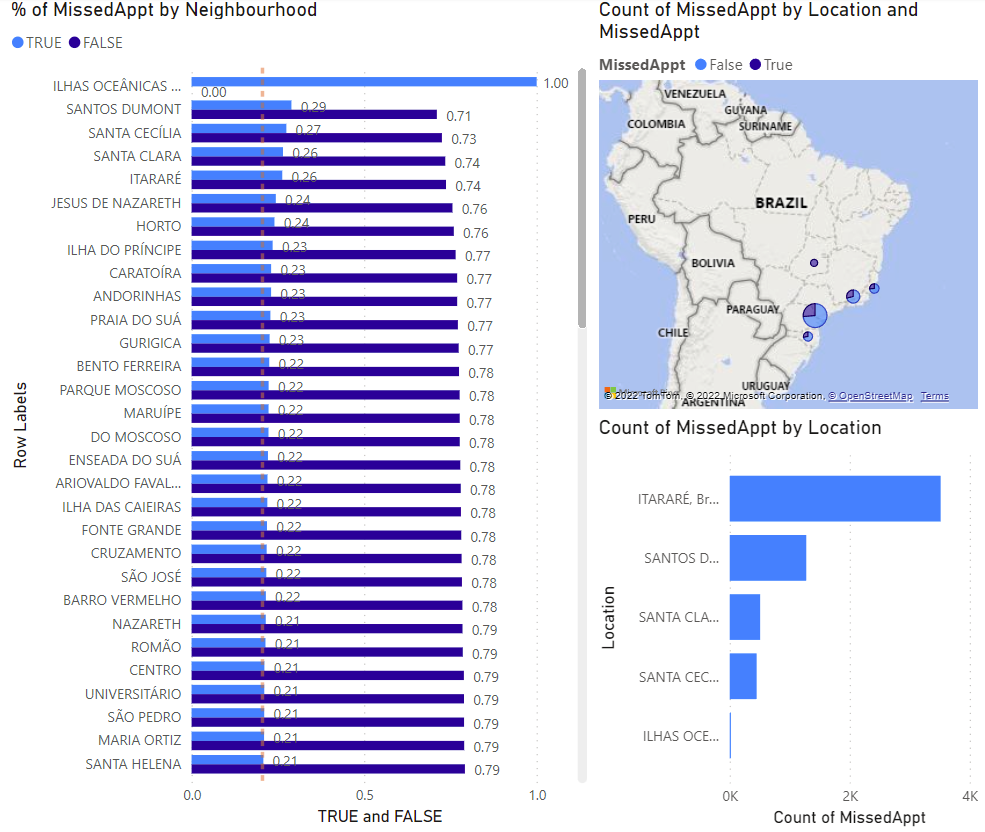

- Here we can see that ILHAS OCEÂNICAS DE TRINDADE is clearly an anomaly and is worth very little in terms of counts so we will ignore
- Of the other top 4, ITARARÉ and, to a lesser extent, SANTOS DUMONT have a much higher count of Missed Appointments
- Going forward - see if there are any issues at these 2 (or the top 4) medical centres. There may be issues like transport, sociodemographic status, difficultly cancelling appointments, friendliness of staff, etc...

In [29]:
# Check if age has a bearing on Neighbourhood

df.groupby(df['Neighbourhood'], as_index=True).Age.mean().sort_values(ascending=False)

Neighbourhood
ILHAS OCEÂNICAS DE TRINDADE    54.500000
AEROPORTO                      53.125000
PRAIA DO CANTO                 50.941063
ILHA DO BOI                    48.628571
PARQUE MOSCOSO                 47.486284
                                 ...    
SANTOS REIS                    31.053016
GURIGICA                       30.135778
JESUS DE NAZARETH              29.979320
SÃO BENEDITO                   28.749131
PARQUE INDUSTRIAL              17.000000
Name: Age, Length: 81, dtype: float64

ILHAS OCEÂNICAS DE TRINDADE has the oldest aged group of this data and may affect that 100% MissedAppt rate - but again as only 2 data points it's not a big factor, otherwise not a foctor.

## Exploring the data - Medical <a class="anchor" id="eleventh-bullet"></a>

From our heatmap from earlier we can see that just having a medical or social need does not affect missed appt and the numbers having these ratings are low compared to the total of data;


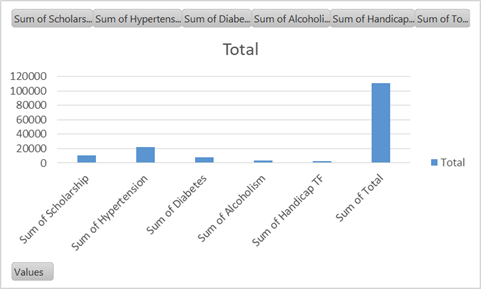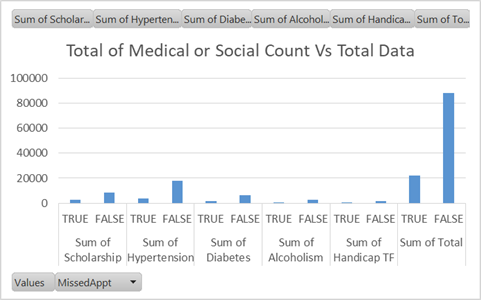

- But lets look at MissedAppt for those who have been given a rating of Medical or Social Need;

In [30]:
df['Scholarship'].value_counts()

0    99661
1    10861
Name: Scholarship, dtype: int64

In [31]:
df.groupby(df['Scholarship'], as_index=True).MissedAppointment.mean().sort_values(ascending=False)


Scholarship
1    0.237363
0    0.198051
Name: MissedAppointment, dtype: float64

In [32]:
df['Hypertension'].value_counts()

0    88722
1    21800
Name: Hypertension, dtype: int64

In [33]:
df.groupby(df['Hypertension'], as_index=True).MissedAppointment.mean().sort_values(ascending=False)


Hypertension
0    0.209012
1    0.173028
Name: MissedAppointment, dtype: float64

In [34]:
df['Diabetes'].value_counts()

0    102579
1      7943
Name: Diabetes, dtype: int64

In [35]:
df.groupby(df['Diabetes'], as_index=True).MissedAppointment.mean().sort_values(ascending=False)


Diabetes
0    0.203609
1    0.180033
Name: MissedAppointment, dtype: float64

In [36]:
df['Alcoholism'].value_counts()

0    107162
1      3360
Name: Alcoholism, dtype: int64

In [37]:
df.groupby(df['Alcoholism'], as_index=True).MissedAppointment.mean().sort_values(ascending=False)


Alcoholism
0    0.201928
1    0.201488
Name: MissedAppointment, dtype: float64

In [38]:
df['Handicap'].value_counts()

0    108285
1      2038
2       183
3        13
4         3
Name: Handicap, dtype: int64

In [39]:
df.groupby(df['Handicap'], as_index=True).MissedAppointment.mean().sort_values(ascending=False)


Handicap
4    0.333333
3    0.230769
0    0.202355
2    0.202186
1    0.178116
Name: MissedAppointment, dtype: float64

- Scholarship - Although only a 1/10 of this data, those with a Scholarship are slightly more likely to miss an appointment (23% Vs 20%)
- Medical need - Having Hypertension or Diabetes does not raise the likelyhood of No show
- Handicap - Being classed as a '4' or a '3' has a higher chance of missing an appointment (33% of 3 people and 23% of 13 people) - Those 3 people assigned as 4 under Handicap may need much more support to attend medical appt (Is it the same person? Would need to look at PatientId)
- Alcoholism - Irrelevant to MissedAppt

## Summary <a class="anchor" id="twelth-bullet"></a>

Main takeaways;
- SMS_reminder
-- Sending an SMS reminder almost halves the number of No shows
- WaitingTime
-- 25% of all Missed Appointments are within the first 3 days
-- 50% of all Missed Appointments are within the first 10 days
-- 75% of all Missed Appointments are within the first 22 days
-- 99% of all Missed Appointments are within the first 72 days
- AppointmentHour
-- People are less likely to miss an appointment before 10am 
-- People are more likely to miss an appointment after 1pm
-- At 5pm almost 1/4 appointments are No Shows, rising to 1/3 at 9pm
- Age & Gender
-- Between 8 and 37, people are more likely to No show (irrelevant of gender)
-- After 44 years old (until 90), people are less likely to No show 
-- Babies, young males, and females (15+) are more likely to book appointments at the doctor
- Neighbourhood
-- Top Neighbourhoods that affect No Shows are ITARARÉ and SANTOS DUMONT
- Medical 
-- Although medical conditions do not affect the rate of No Show, those with a Scholarship, and a Handicap assigned as '3' or '4' have a higher chance of missed appointments